In [1]:
import pandas as pd

perch = pd.read_csv("perch2.csv")
perch.head()

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [2]:
corr = perch.corr()
corr

,length,height,width,weight
length,1.000000,0.985620,0.974574,0.958656
height,0.985620,1.000000,0.982843,0.968413
width,0.974574,0.982843,1.000000,0.963924
weight,0.958656,0.968413,0.963924,1.000000


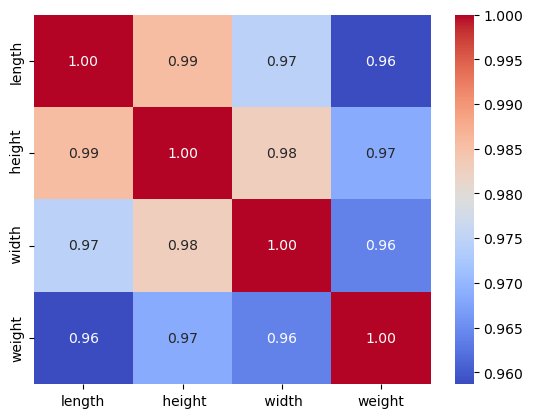

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, cmap = "coolwarm", annot = True, fmt = ".2f")
plt.show()

In [4]:
X = perch.drop("weight", axis = 1)
Y = perch['weight']

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 일반적으로 VIF 값이 5 또는 10을 초과하면 다중공선성 문제가 있다고 봅니다.
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,length,230.195833
1,height,413.582382
2,width,247.585361


In [6]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_scaled, train_y)

LinearRegression()

In [9]:
coef = model.coef_
coef

array([ 29.87662196, 170.7741176 , 155.66847034])

In [10]:
model.intercept_

410.4500000000001

In [11]:
model.score(test_scaled, test_y)

0.9156665365710654

In [12]:
pred = model.predict(test_scaled)
pred

array([845.77337175, 371.06750339, 742.80206607, 638.91886187,
       162.06609061,  -8.22288123, 178.71890987, 269.17813604,
       147.89245845, 343.83585476, 269.71987014, 688.62881542,
        68.30983414,  43.28146442])

In [13]:
abs(pred - test_y).mean()

67.15619839562076

In [14]:
(((pred - test_y) ** 2).mean()) ** (1/2)

74.27013932063569

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, pred) ** (1/2)

74.27013932063569

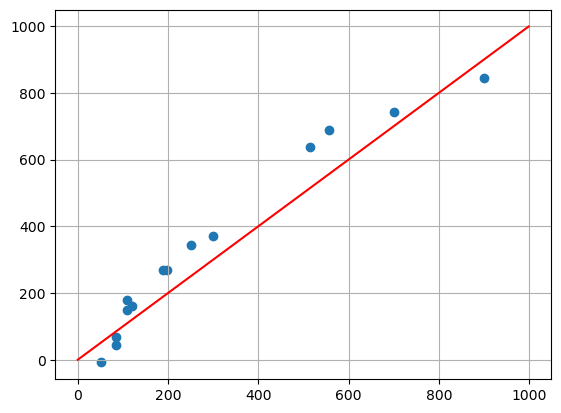

In [16]:
plt.scatter(test_y, pred)
plt.plot(range(1000), range(1000), color = 'red')
plt.grid()
plt.show()

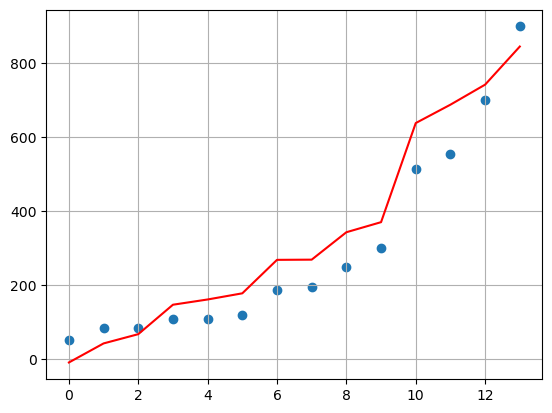

In [17]:
plt.scatter(range(len(test_y)), sorted(test_y))
plt.plot(range(len(test_y)), sorted(pred), color = 'red')
plt.grid()
plt.show()

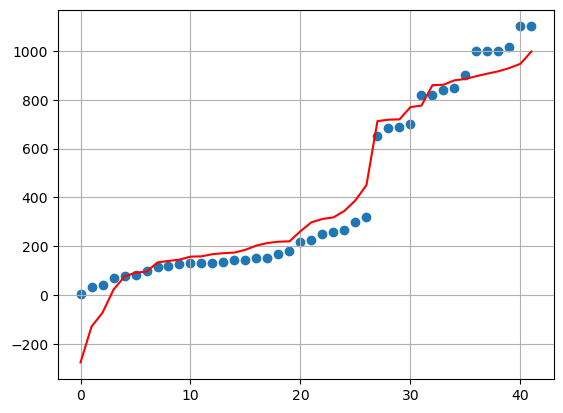

In [18]:
pred = model.predict(train_scaled)
plt.scatter(range(len(train_y)), sorted(train_y))
plt.plot(range(len(train_y)), sorted(pred), color = 'red')
plt.grid()
plt.show()

In [19]:
model.fit(X, Y)

LinearRegression()

In [21]:
model.coef_

array([ 2.9082713 , 67.20469902, 67.26029602])

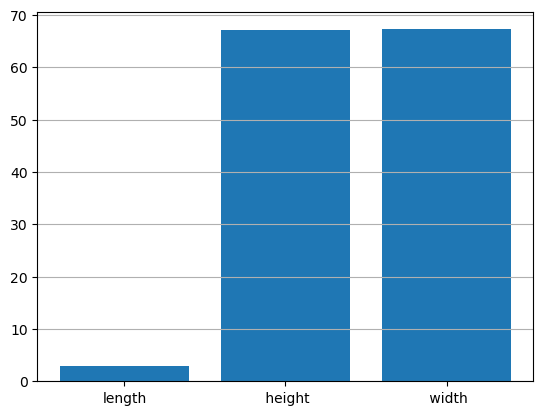

In [20]:
plt.bar(perch.drop("weight", axis = 1).columns, model.coef_)
plt.grid(axis = 'y')
plt.show()

## 릿지 회귀 (Ridge Regression - L2 규제)
릿지 회귀는 비용 함수에 ```모든 회귀 계수의 제곱합(L2 norm)```에 비례하는 패널티 항을 추가합니다.

* 다중 공선성(Multicollinearity, 특성 간 높은 상관관계) 문제가 있을 때 안정적인 결과를 제공하는 경향이 있습니다.

```비용 함수: 기존 OLS 비용 함수 + α * Σ(계수_i)²```

In [23]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [26]:
model = Ridge(alpha = 1)
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.9159190625190113

## 라쏘 회귀 (Lasso Regression - L1 규제)
라쏘 회귀는 비용 함수에 ```모든 회귀 계수의 절대값 합(L1 norm)```에 비례하는 패널티 항을 추가합니다.

* 불필요하거나 영향력이 적은 특성의 회귀 계수를 정확히 0으로 만들 수 있습니다. 이는 특성 선택(Feature Selection) 효과로 이어져 모델을 단순화하고 해석력을 높일 수 있습니다.

```비용 함수: 기존 OLS 비용 함수 + α * Σ|계수_i|```

In [27]:
model = Lasso(alpha = 1)
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.915901155502695

## 엘라스틱넷 회귀 (Elastic Net Regression)
엘라스틱넷 회귀는 릿지(L2)와 라쏘(L1) 규제를 결합한 방식입니다. L1 패널티와 L2 패널티 모두를 비용 함수에 추가합니다.

```비용 함수: 기존 OLS 비용 함수 + α * [ ρ * Σ|계수_i| + (1-ρ)/2 * Σ(계수_i)² ]```

* ρ = 1 이면 라쏘 회귀와 동일합니다.
* ρ = 0 이면 릿지 회귀와 동일합니다.
* 0 < ρ < 1 이면 L1과 L2 규제를 혼합하여 사용합니다.

In [29]:
model = ElasticNet(alpha = 1, l1_ratio=0.5)
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.8979337392710132